In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [7]:
my_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv" , delimiter = ",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
my_data.shape

(200, 6)

In [10]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
x = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K',]].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [20]:
print('bp :',my_data['BP'].unique())
print('sex :',my_data['Sex'].unique())
print('cholesterol :',my_data['Cholesterol'].unique())

bp : ['HIGH' 'LOW' 'NORMAL']
sex : ['F' 'M']
cholesterol : ['HIGH' 'NORMAL']


In [22]:
# pre-processing
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:, 1]=le_sex.transform(x[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['HIGH','LOW','NORMAL'])
x[:,2] = le_BP.transform(x[:,2])

le_chol = preprocessing.LabelEncoder()
le_chol.fit(['HIGH','NORMAL'])
x[:,3]=le_chol.transform(x[:,3])

x[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [33]:
# fill the target variable
y = my_data["Drug"].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [34]:
from sklearn.model_selection import train_test_split

x_trainset , x_testset , y_trainset , y_testset = train_test_split(x , y , test_size = 0.3 , random_state = 3)

In [35]:
print('shape of x trainging set {} '.format(x_trainset.shape),'&','shape of y training set {}'.format(y_trainset.shape))

shape of x trainging set (140, 5)  & shape of y training set (140,)


In [36]:
print('shape of x testing set {} '.format(x_testset.shape),'&','shape of y testing set {}'.format(y_testset.shape))

shape of x testing set (60, 5)  & shape of y testing set (60,)


In [37]:
# modeling
drugtree = DecisionTreeClassifier(criterion  = 'entropy',max_depth = 4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
drugtree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
predtree = drugtree.predict(x_testset)

In [41]:
print(predtree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [42]:
# evaluation 
from sklearn import metrics 
import matplotlib.pyplot as plt
print('decisiontrees accuracy : ',metrics.accuracy_score(y_testset , predtree))

decisiontrees accuracy :  0.9833333333333333


[Text(348.75, 489.24, 'X[4] <= 14.615\nentropy = 1.929\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(279.0, 380.52000000000004, 'X[2] <= 0.5\nentropy = 1.832\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(139.5, 271.8, 'X[0] <= 50.5\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(69.75, 163.08000000000004, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(209.25, 163.08000000000004, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(418.5, 271.8, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(348.75, 163.08000000000004, 'X[2] <= 1.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(488.25, 163.08000000000004, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(418.5, 380.52000000000004, '

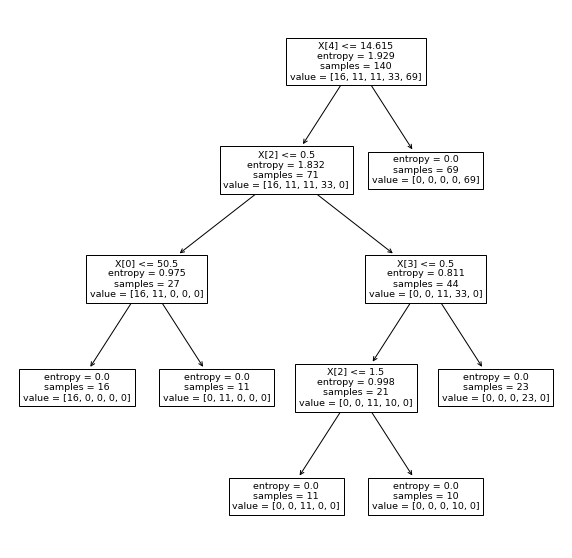

In [51]:
# visualization
plt.figure(figsize=(10,10))
tree.plot_tree(drugtree)
